<a href="https://colab.research.google.com/github/mars-orbiter/HydroDynamic-Solver/blob/main/Motion_of_a_star_in_Galactic_Potential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###AA 609 : Computational Methods for Astronomy and Space Sciences

Consider a density profile for an elliptical galaxy is given by

$$\rho(r) = \frac{M}{2\pi}\frac{a}{r}\frac{1}{(r + a)^3}$$

where M is the total mass and a is the scale length and r is the spherical radius.

* Obtain the gravitational potential that will correspond to the above given density profile using analytical methods.

* Write the equation of motion for a star moving in such a gravitational potential and solve it numerically using
Euler and Runge Kutta 4th order method and plot the stellar orbit for both methods.

**Solution -**

$\underline{\text{Density profile}}$ - $$\rho(r) = \frac{M}{2\pi}\frac{a}{r}\frac{1}{(r + a)^3}$$

$\underline{\text{Gravitational Potential}}$ - $$\Phi(r) = - \frac{GM}{r+a}$$

$\underline{\text{Equation of motion of star}}$ -
$$(1+au)+ \frac{GMm}{L^2} ln(1+au) \hspace{1mm}+ \frac{(1+au)^3}{6a} = \frac{\theta^2}{2a}$$ which can be further simplififed.

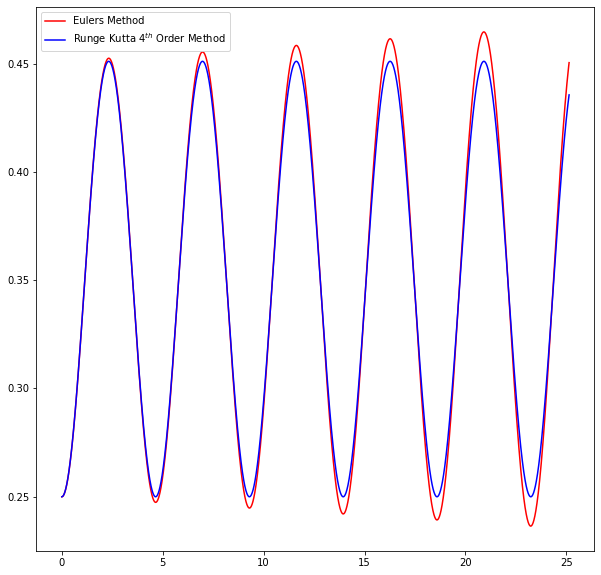

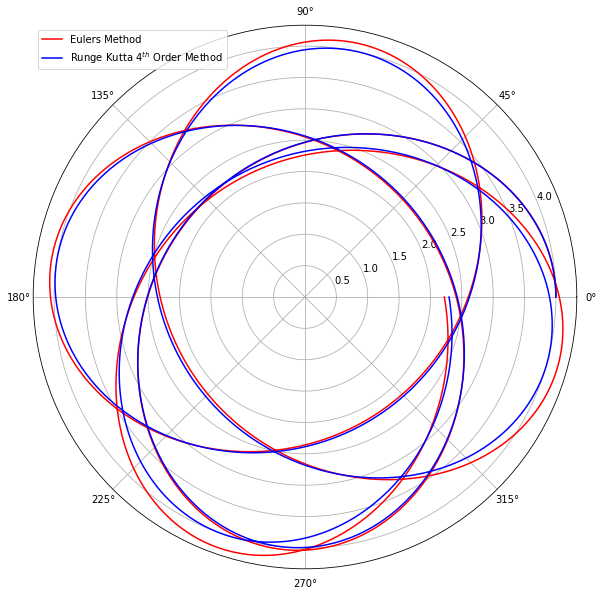

In [29]:
import numpy as np
import matplotlib.pyplot as plt

a=2
#taking other parameters G,M,m,L,r all equal to 1
#Defining coupled differential equations
# Defining dv/d0 = d^2u/d0^2
def f1(theta,u,v):
  return -u + (1/(1+a*u)**2) #-G*M/(r+a)**2 - u#
# Defining du/d0 = v
def f2(theta,u,v):
  return v

# Defining theta range
theta0=0
theta=8*np.pi
N= 4000
thetav= np.linspace(theta0,theta,N)
h= thetav[1]-thetav[0]

# Initial Conditions
v_eul=np.zeros(N)
u_eul=np.zeros(N)
v_eul[0]=0
u_eul[0]= 1/4

v_rk4=np.zeros(N)
u_rk4=np.zeros(N)
v_rk4[0]=0
u_rk4[0]=1/4

# A) By Euler's Method 
for i in range(1,N):
  v_eul[i]= v_eul[i-1]+ h*f1(thetav[i-1],u_eul[i-1],v_eul[i-1])
  u_eul[i]= u_eul[i-1] + h*f2(thetav[i-1],u_eul[i-1],v_eul[i-1])

# B) By Runge Kutta 4th Order Method
for i in range(1,N):
  k1_rk4=h*f2(thetav[i-1],u_rk4[i-1],v_rk4[i-1])
  c1_rk4=h*f1(thetav[i-1],u_rk4[i-1],v_rk4[i-1])

  k2_rk4=h*f2(thetav[i-1]+(h/2),u_rk4[i-1]+(k1_rk4/2),v_rk4[i-1]+(c1_rk4/2))
  c2_rk4=h*f1(thetav[i-1]+(h/2),u_rk4[i-1]+(k1_rk4/2),v_rk4[i-1]+(c1_rk4/2))

  k3_rk4=h*f2(thetav[i-1]+(h/2),u_rk4[i-1]+(k2_rk4/2),v_rk4[i-1]+(c2_rk4/2))
  c3_rk4=h*f1(thetav[i-1]+(h/2),u_rk4[i-1]+(k2_rk4/2),v_rk4[i-1]+(c2_rk4/2))

  k4_rk4=h*f2(thetav[i-1]+(h),u_rk4[i-1]+(k3_rk4),v_rk4[i-1]+(c3_rk4))
  c4_rk4=h*f1(thetav[i-1]+(h),u_rk4[i-1]+(k3_rk4),v_rk4[i-1]+(c3_rk4))

  v_rk4[i]= v_rk4[i-1] + (1/6)*(c1_rk4 +2*c2_rk4 + 2*c3_rk4 + c4_rk4)
  u_rk4[i]=u_rk4[i-1]+(1/6)*(k1_rk4 +2*k2_rk4 + 2*k3_rk4 + k4_rk4)

# Plotting 
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.plot(thetav,u_eul,'r',label='Eulers Method')
plt.plot(thetav,u_rk4,'b',label='Runge Kutta $4^{th}$ Order Method')
plt.legend()
plt.show()

# Plotting Elliptical Orbit
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.axes(projection = 'polar')
plt.plot(thetav,u_eul**(-1),'r',label='Eulers Method')
plt.plot(thetav,u_rk4**(-1),'b',label='Runge Kutta $4^{th}$ Order Method')
plt.legend()
plt.show()